<a href="https://www.kaggle.com/code/huseyincosgun/feature-engineering?scriptVersionId=138508628" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #0C6A86; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">🔬 Feature Engineering </div>
**1. Outliers (Aykırı Değerler)**

**2. Missing Values (Eksik Değerler)**

**3. Encoding**

**4. Feature Scaling (Özellik Ölçeklendirme)**

**5. Feature Extraction (Özellik Çıkarımı)**

**6. Feature Interactions (Özellik Etkileşimleri)**

**7. End - to - End Application (Uçtan Uca Uygulama)**

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">1. Outliers (Aykırı Değerler) 📁</h3>

**How do you define outliers?**

**In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.**

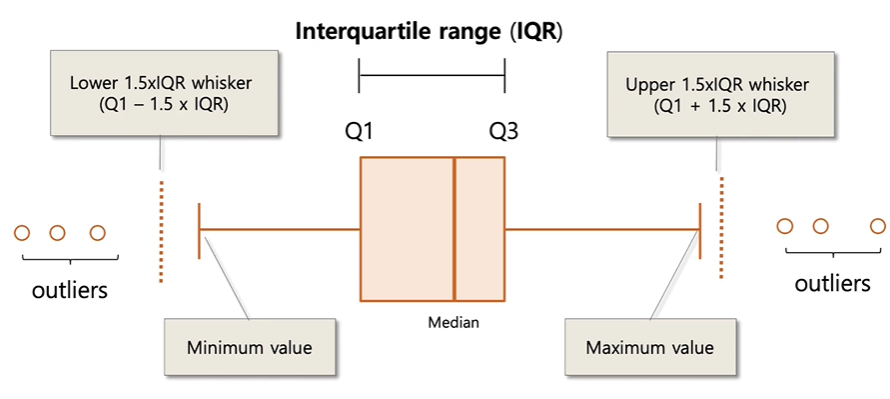

In [1]:
# FEATURE ENGINEERING 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install missingno

In [3]:
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

def load_application_train():
    data = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
    return data

dff = load_application_train()
dff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
def load():
    data = pd.read_csv("/kaggle/input/titanic/train.csv")
    return data

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


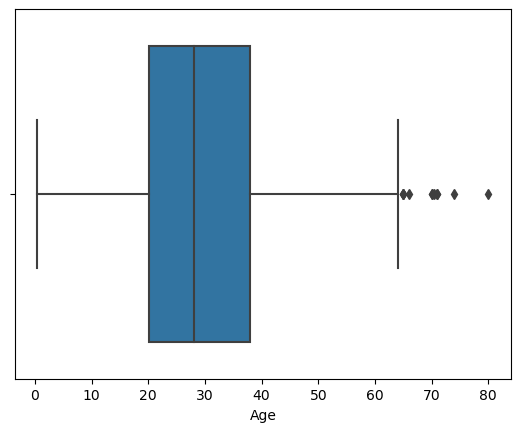

In [5]:
sns.boxplot(x=df["Age"])
plt.show()

In [6]:
#Aykırı değerler nasıl yakalanır ?
#How to catch outliers?

def create_IQR(dataframe):
    global low, up, iqr
    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    iqr = q3- q1 
    up = q3 + 1.5 * iqr
    low = q1 - 1.5 * iqr
    
    print("----------- q1 value--------------")
    print(q1)
    print("----------- q3 value--------------")
    print(q3)
    print("----------- iqr value--------------")
    print(iqr)
    print("----------- up value--------------")
    print(up)
    print("----------- low value--------------")
    print(low) 

create_IQR(df["Age"])

----------- q1 value--------------
20.125
----------- q3 value--------------
38.0
----------- iqr value--------------
17.875
----------- up value--------------
64.8125
----------- low value--------------
-6.6875


In [7]:
#Show Outliers with all information
df[(df["Age"] < low) | (df["Age"] > up)] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [8]:
#Show Outliers only index number
df[(df["Age"] < low) | (df["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [9]:
# I just want to know if there is an outlier or not.
df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)

True

In [10]:
# Are there samples above the upper limit?
df[(df["Age"] > up)].any(axis=None)

True

In [11]:
# Are there samples under the lower limit?
df[(df["Age"] < low)].any(axis=None)

False

### Converting all steps into functions
-----------------------

In [12]:
# 1. Function defining limit values
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    
    return low_limit, up_limit

outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [13]:
low, up = outlier_thresholds(df, "Age")
#Show Outliers only index number
df[(df["Age"] < low) | (df["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [14]:
#2. Check if there are any outliers?
def check_outlier(dataframe,col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    
    else:
        return False

check_outlier(df, "Age")

True

In [15]:
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

'\n\nVeri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.\nNot: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.\n\nParameters\n------\n    dataframe: dataframe\n            Değişken isimleri alınmak istenilen dataframe\n    cat_th: int, optional\n            numerik fakat kategorik olan değişkenler için sınıf eşik değeri\n    car_th: int, optinal\n            kategorik fakat kardinal değişkenler için sınıf eşik değeri\n\nReturns\n------\n    cat_cols: list\n            Kategorik değişken listesi\n    num_cols: list\n            Numerik değişken listesi\n    cat_but_car: list\n            Kategorik görünümlü kardinal değişken listesi\n\nExamples\n------\n    import seaborn as sns\n    df = sns.load_dataset("iris")\n    print(grab_col_names(df))\n\n\nNotes\n------\n    cat_cols + num_cols + cat_but_car = toplam değişken sayısı\n    num_but_cat cat_cols\'un içerisinde.\n    Return olan 3 liste toplamı toplam d

In [16]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [18]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [19]:
num_cols

['PassengerId', 'Age', 'Fare']

In [20]:
num_cols = [col for col in num_cols if col not in "PassengerId"]
num_cols

['Age', 'Fare']

In [21]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [22]:
cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [23]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]
for col in num_cols:
    print(col, check_outlier(dff, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

### Aykırı Değerlere Erişmek
-----------------------

In [24]:
# shape[0]: Gözlem sayısı, shape[1]: Değişken sayısı
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index
    
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [25]:
age_index = grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q



### Aykırı Değer Problemini Çözme
-----------------------

In [26]:
# Silme
low, up = outlier_thresholds(df, "Fare")

In [27]:
df.shape

(891, 12)

In [28]:
# Aykırı değerler maskesi uyguladıktan sonra yeni şablon:
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape

(775, 12)

In [29]:
# Aykırı değerlerin çıkarıldığı yen dataframe i almak istiyorum
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [30]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
    new_df = remove_outlier(df, col)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [31]:
# Aykırı değerlerin temizlenmesinden sonra kaç gözlem silindi:
df.shape[0] - new_df.shape[0]

116

In [32]:
#Fakat silme yönteminde aynı satırda yer alan gözlem bilgileride silinmiş oluyor
#Silmek yerine baskılama yöntemini de kullanabiliz.
#BASKILAMA YÖNTEMİ (re-assignment with thresholds)

#Strateji: Aykırı değerler eşik değerler ile değiştirilir. Bu sayede tüm gözlem bilgisi silinmeden kullanılır.
low, up = outlier_thresholds(df, "Fare")

df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"].head()


1     71.283
27   263.000
31   146.521
34    82.171
52    76.729
Name: Fare, dtype: float64

In [33]:
#Alt ve üst sınırları aşan değerlere sınır değerini veriyoruz
df.loc[(df["Fare"] > up), "Fare"] = up
df.loc[(df["Fare"] < low), "Fare"] = low

In [34]:
# Bu işlemi fonksiyon formuna alalım:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [35]:
df = load()

cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
    print(col, check_outlier(df, col))


Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
Age True
Fare True


In [36]:
#Aykırı değerler mevcut, aykırı değerleri baskılayalım
for col in num_cols:
    replace_with_thresholds(df, col)

for col in num_cols:
    print(col,check_outlier(df, col))

Age False
Fare False


In [37]:
#Re-cap
df = load()
outlier_thresholds(df, "Age")
check_outlier(df, "Age")

True

In [38]:
grab_outliers(df, "Age", index=True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [39]:
remove_outlier(df, "Age").shape

(880, 12)

In [40]:
replace_with_thresholds(df, "Age")
check_outlier(df, "Age")

False

-----------------------
### Çok Değişkenli Aykırı Değer Analizi (Local Outlier Factor)
-----------------------

Tek başına aykırı olmayıpta, diğer değişkenler ile aykırı olma durumudur.

Örneğin: 15 yaşında olmak herhangi bir aykırılık göstermez. Fakat 15 yaşında olup 5 kez evlenmiş olmak aykırı bir durumu oluşturur.

#### Outlier detection with Local Outlier Factor (LOF)

LOF ne yapar ?

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer tanımı yapabilmemizi sağlar.

-- Noktaların çevresinde bulunan yoğunluğa göre skorlama değeri alır.

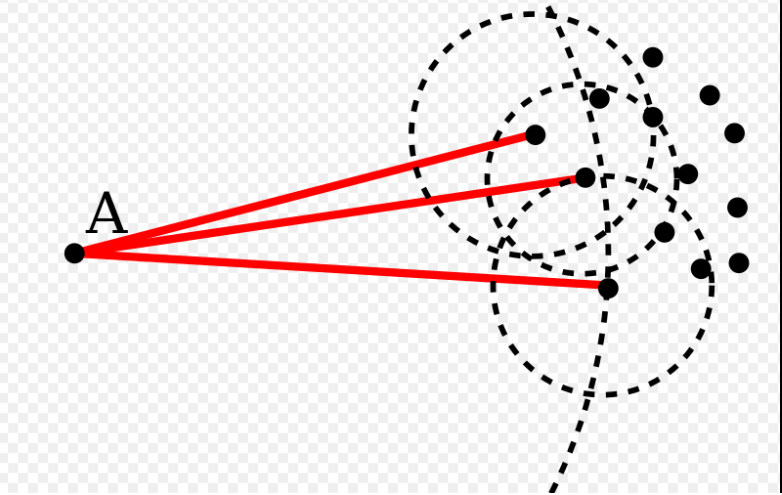

Basic idea of LOF: comparing the local density of a point with the densities of its neighbors. A has a much lower density than its neighbors.

Ref: https://en.wikipedia.org/wiki/Local_outlier_factor#/media/File:LOF-idea.svg

**1 den uzaklaştıkça ilgili gözlemin outlier olma durumu artar:**

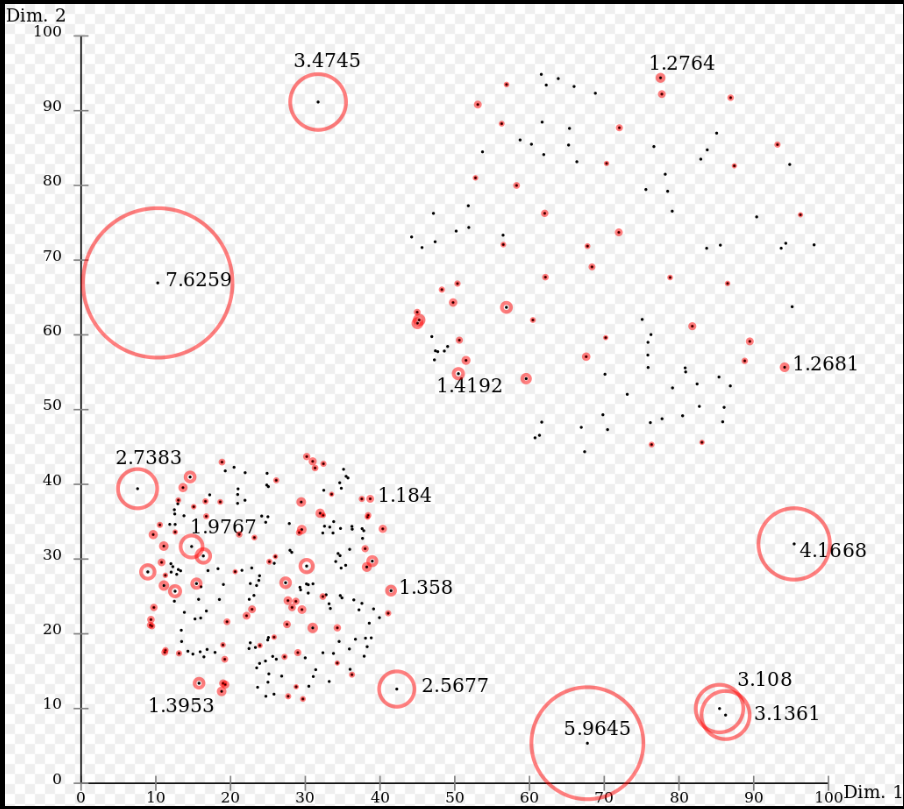


**Eğer 2 değişken varsa bunu rahatlıkla görsele dökebiliriz peki daha fazla sayısa olursa ?** 

Nasıl 2 boyuta indirgenebilir ? : PCA ( Principal Component Analysis) Temel Bileşenler Analizi



In [41]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [42]:
#Bu datasetinde outlier varmı kontrol edelim:

for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [43]:
#Carat değişkeni 1889 adet aykırı değer barındıyor gözleme göre
low, up = outlier_thresholds(df, "carat")

df[((df["carat"] < low) | (df["carat"] > up))].shape

(1889, 7)

In [44]:
low, up = outlier_thresholds(df, "depth")

df[((df["depth"] < low) | (df["depth"] > up))].shape


(2545, 7)

In [45]:
# Değişkenleri tek başlarına ve yüksek limit değerlerinde kullanarak outlier yaparsak bir çok veriyi kaybetmiş oluruz.
#Bunu önlemek için LOF kullanıyoruz:

clf = LocalOutlierFactor(n_neighbors=20)

#Yöntemi dataframe e uyguluyorum
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [46]:
df_scores = clf.negative_outlier_factor_
df_scores[:5]

#Local Outlier Factor Skorları:
# Okunabilirlik açısından negatif olarak kalmalarını istiyoruz.

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [47]:
#En kötü 5 gözlem:
np.sort(df_scores)[:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

#### Elbow method
-----------------------

İngilizceden çevrilmiştir-Küme analizinde dirsek yöntemi, bir veri setindeki küme sayısının belirlenmesinde kullanılan bir buluşsal yöntemdir. Yöntem, açıklanan varyasyonun küme sayısının bir fonksiyonu olarak çizilmesinden ve kullanılacak küme sayısı olarak eğrinin dirseğinin seçilmesinden oluşur.


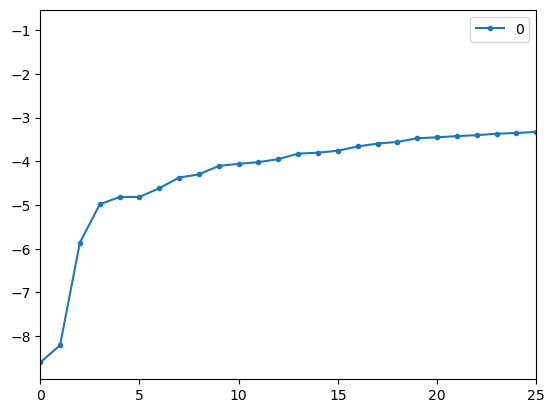

In [48]:
#Eşik değeri en son gerçekleşen sert değişim olarak belirleyebiliriz:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 25], style='.-')
plt.show()

In [49]:
# 3. indexten sonra sert kırılımlar yaşanmamış bu notayı eşik değer olarak alabiliriz:
th = np.sort(df_scores)[3]
th

-4.984151747711709

In [50]:
# Hangi gözlemler bu eşik değerin altında kalıyor ?
df[df_scores < th]

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


In [51]:
#Neden bu gözlemler aykırı değer olarak tespit edildi ?
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


### Neler öğrendik: 

***1- Outliers***

***2- IQR***

***3- Outlier detection with Local Outlier Factor (LOF)***

***4- Elbow method***

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">2. Missing Values(Eksik Değerler) 📁</h3>

**The idea of imputation is both seductive and dangerous.**


In [52]:
#### Eksik değerlerin yakalanması
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [53]:
# genel olarak df de eksik veri varmı ?
df.isnull().values.any()

True

In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [56]:
# En az 1 tane eksik değer içeren gözlemlere erişelim
df[df.isnull().any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S


In [57]:
# Hiç eksik hücre içermeyen gözlemleri görelim
df[df.notnull().all(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000,0,0,113783,26.550,C103,S


In [58]:
# Eksikliğe göre değişkenleri sırala

df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [59]:
#Yüzdelik olarak eksiklik oranları
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin         77.104
Age           19.865
Embarked       0.224
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
dtype: float64

In [60]:
#Sadece eksik değere sahip olan değişkenleri al:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
na_cols

['Age', 'Cabin', 'Embarked']

In [61]:
#Tüm bilgileri tek bir fonksiyon aracaılığı ile toplayalım:

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss','ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns

missing_values_table(df)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


#### Eksik Değer Problemini Çözme
-----------------------

In [62]:
# Çözüm - 1 : Silerek
# dropna kullanırsak satırda yalnızca tek bir hücre boş olmasına rağmen tüm örneklemi siler.
df.shape

(891, 12)

In [63]:
df.dropna().shape

(183, 12)

In [64]:
df["Age"].fillna(df["Age"].mean()).isnull().sum()
df["Age"].fillna(df["Age"].median()).isnull().sum()
df["Age"].fillna(0).isnull().sum()


0

In [65]:
# Çözüm - 2 : Basit atama yöntemleri ile doldurmak
# Boş hücreleri median, mean değerleri ile doldurabiliriz

#df["Age"].fillna(df["Age"].mean())
#df["Age"].fillna(df["Age"].median())
#df["Age"].fillna(0)

# Peki df de birden fazla na değerine sahip farklı değişkenler varsa ne yapmalıyım:
# Eğer değişken türü Object ise es geç fakat sayısal bir değişkense lambda yı uygula:
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [66]:
# dff e genel bir bakış atalım:
# Sayısal değişkenlerdeki na hücrelerini doldurduk fakat kategorik veri türleri hala eksik:
dff.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [67]:
dff.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
# Kategorik değişkenler için en mantıklı boş değer doldurma yöntemi modunu almaktır:
# Değişken içerisinde en çok tekrar eden değere ulaşarak sorunu çözebiliriz:
dff["Embarked"].mode()[0]
dff["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()


# Veya bu hücreleri özel bir string değeri ile doldurabiliriz:
#df["Embarked"].fillna("missing")

0

In [69]:
# Kategorik değişkenler için süreci daha kolay hale getirelim:
dff.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Kategorik Değişken Kırılımında Değer Atama
-----------------------

In [70]:
# Veri setinde kadın ve erkeklerin bulunduğunu göz önüne alacak olursak, 
# Bütün boş yaş değerlerine ortak bir ortalama yaş atamak mantıklı olmayabilir.
# Bu nedenle cinsiyet ayrımına göre yaş hesabı yaparak atama yapmak daha sağlıklı olacaktır
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [71]:
df.groupby("Sex")["Age"].mean()

Sex
female   27.916
male     30.727
Name: Age, dtype: float64

In [72]:
# Kadın ve erkeklere ayrı ayrı ort yaş hesabı yap ve cinsiyetlerine göre atama yap:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [73]:
# Daha açık şekilde loc kullanımı ile yaparsak eğer. female ve yaş bilgisi olmayanlar:
df.loc[(df["Age"].isnull()) & (df["Sex"] == "female")].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.879,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.750,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.750,NaN,Q


In [74]:
df.groupby("Sex")["Age"].mean()["female"]

27.915708812260537

In [75]:
# yalnızca yaş bilgisine erişim sapladım:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"].head()

19   NaN
28   NaN
31   NaN
32   NaN
47   NaN
Name: Age, dtype: float64

In [76]:
# Kadınlar için ortalama yaşa sahibim ve boş hücrelerin bilgisinede sahibim, Sırada atama işlemi kaldı:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]
df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

In [77]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

#### Tahmine Dayalı Atama İşlemi
-----------------------

In [78]:
# Çözüm 3 : Tahmine Dayalı Atama ile Doldurma
df = load()

In [79]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [80]:
# çok sayıda değere sahip olan kategorik değişkenleri bu çalışmaya dahil etmiyorum.
# encoding yöntemi için uygun değiller.
cat_but_car

['Name', 'Ticket', 'Cabin']

In [81]:
# get_dummies kullanarak kategorik değişkenleri numerik değişkenlere çeviriyoruz:
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,1,0,1
1,1,1,1,0,38.000,71.283,0,0,0
2,1,3,0,0,26.000,7.925,0,0,1
3,1,1,1,0,35.000,53.100,0,0,1
4,0,3,0,0,35.000,8.050,1,0,1


In [82]:
# değişkenlerin standartlaştırılması
# Veri setini 0 - 1 aralığında ölçeklendiriyoruz:
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

# Veriyi makine öğrenmesi metodlarında kullanabilmem için uygun forma getirmem gerekiyor.
# Bir dizi işlem uygulamamızın sebebi budur.

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [83]:
# knn in uygulanması: Komşularına göre ortalama değer alarak boş hücreler doldurulur
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [84]:
# İşlem tamamlandı fakat gözlem yaptığım değerler standartlaştırılmış şekilde görülüyor
# Bu süreci tersine doğru işletmem gerekiyor, anlamlı yorum yapabilmem için inverse uyguluyorum
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,3.000,1.000,0.000,22.000,7.250,1.000,0.000,1.000
1,1.000,1.000,1.000,0.000,38.000,71.283,0.000,0.000,0.000
2,1.000,3.000,0.000,0.000,26.000,7.925,0.000,0.000,1.000
3,1.000,1.000,1.000,0.000,35.000,53.100,0.000,0.000,1.000
4,0.000,3.000,0.000,0.000,35.000,8.050,1.000,0.000,1.000


In [85]:
# Şu anda hangi değerleri atadığımı görmem gerek
df["age_imputed_knn"] = dff[["Age"]]

In [86]:
# hangi nan değere hangi yaş denk geliyor
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]].head()

,Age,age_imputed_knn
5,NaN,47.800
17,NaN,37.600
19,NaN,12.200
26,NaN,32.800
28,NaN,17.600


In [87]:
df.loc[df["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q,47.800
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,37.600
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,12.200
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C,32.800
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.879,NaN,Q,17.600


#### Eksik Verinin Yapısını İncelemek
---------------

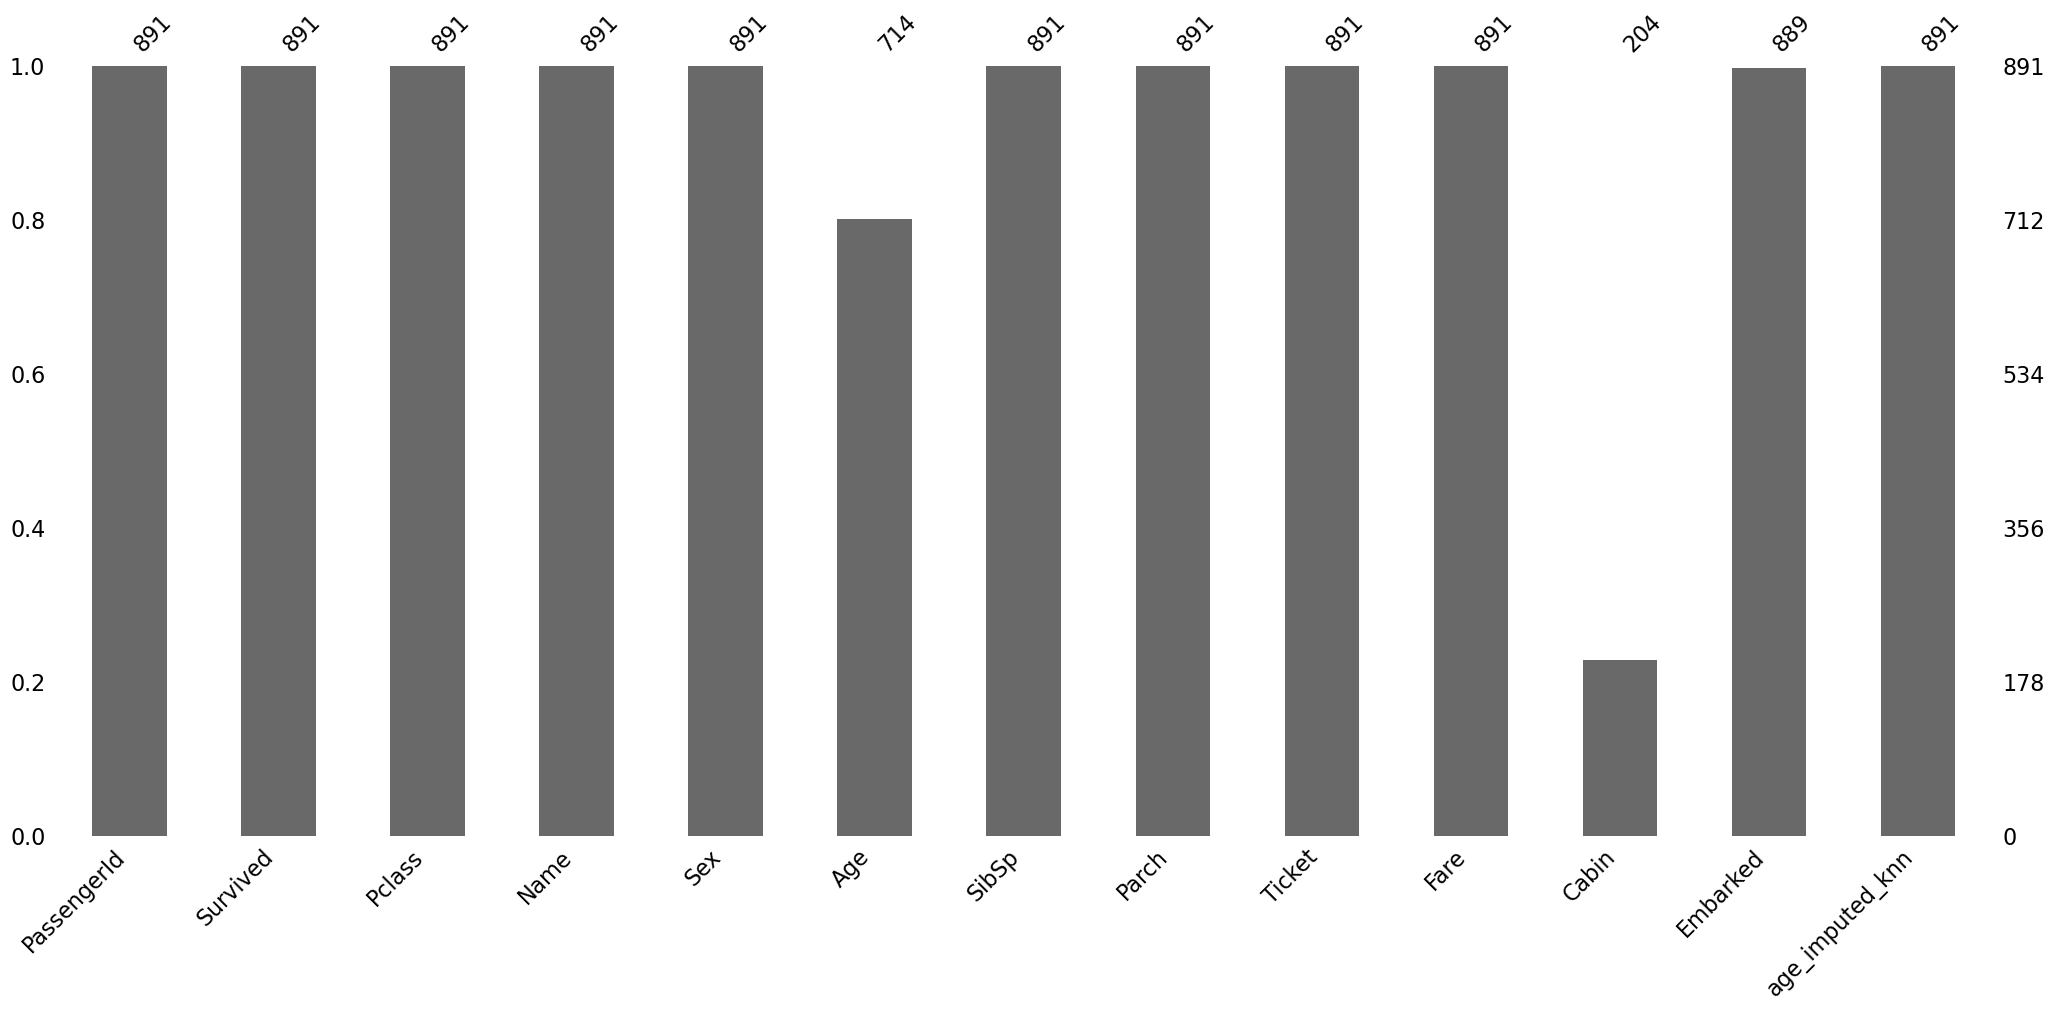

In [88]:
msno.bar(df)
plt.show()

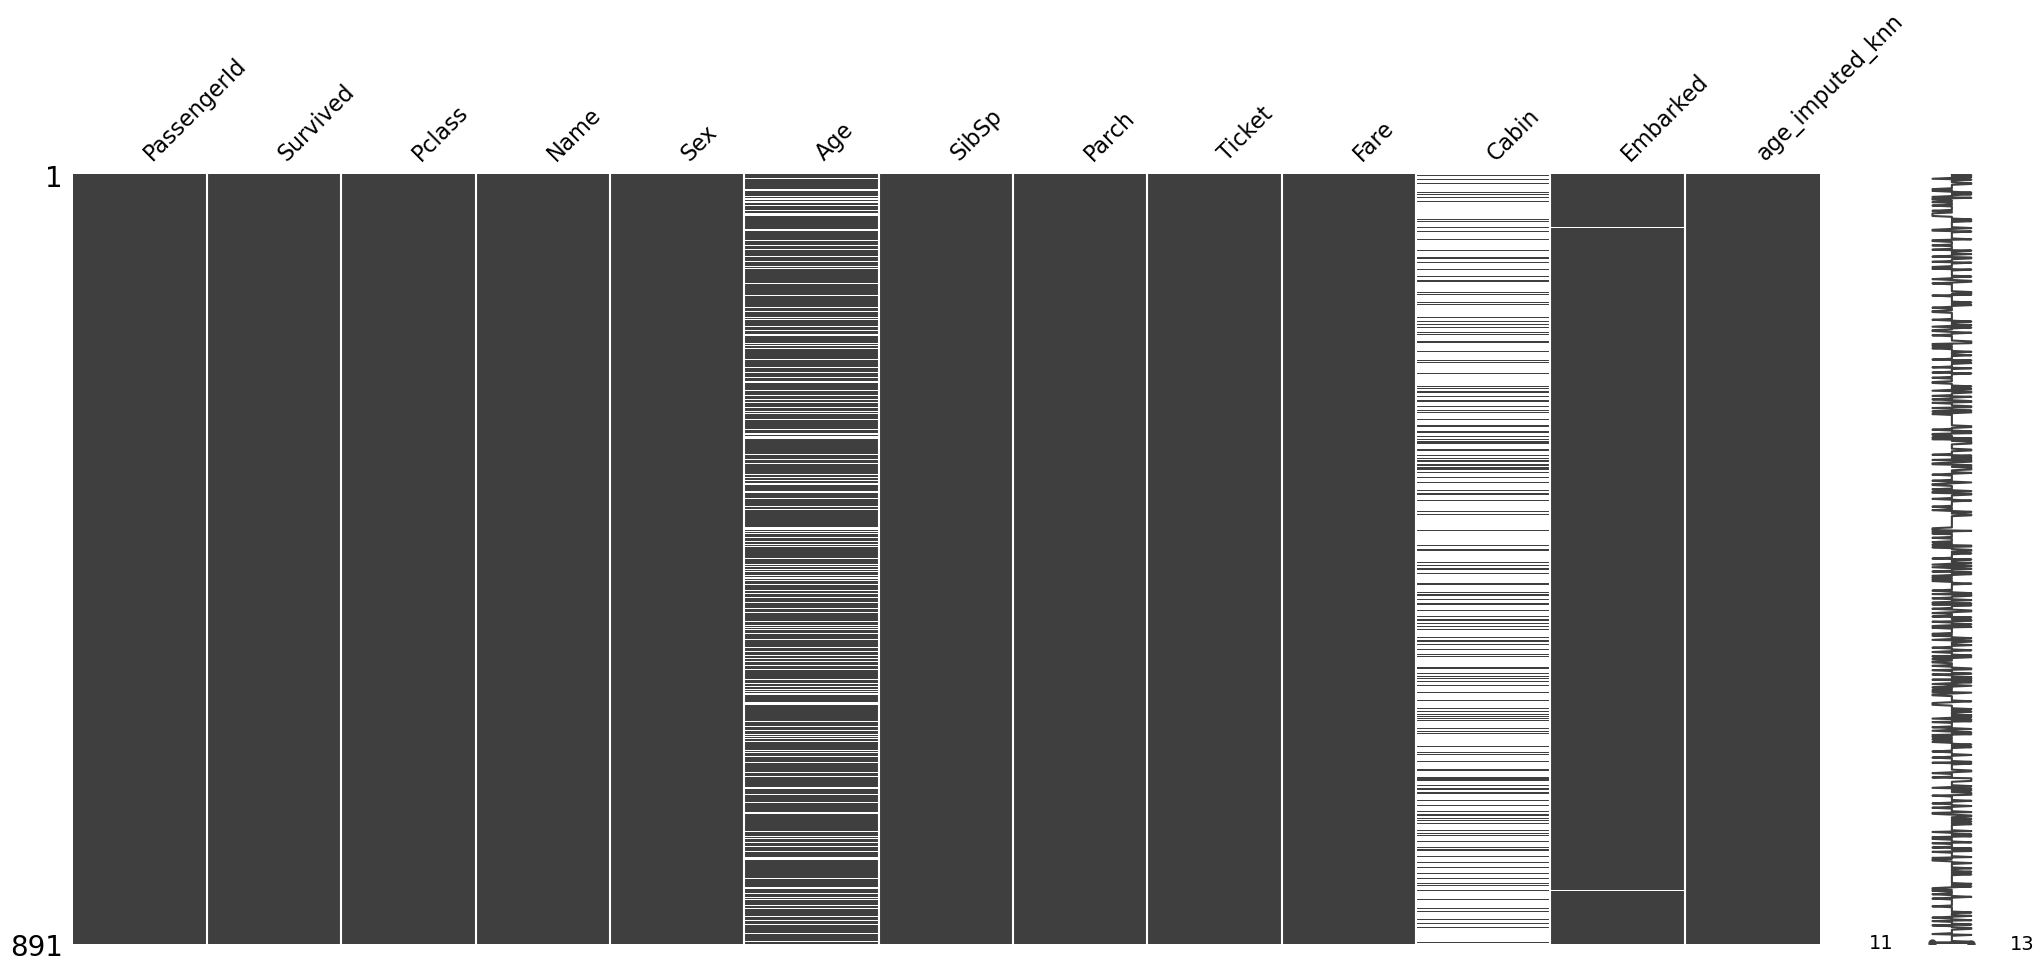

In [89]:
msno.matrix(df)
plt.show()

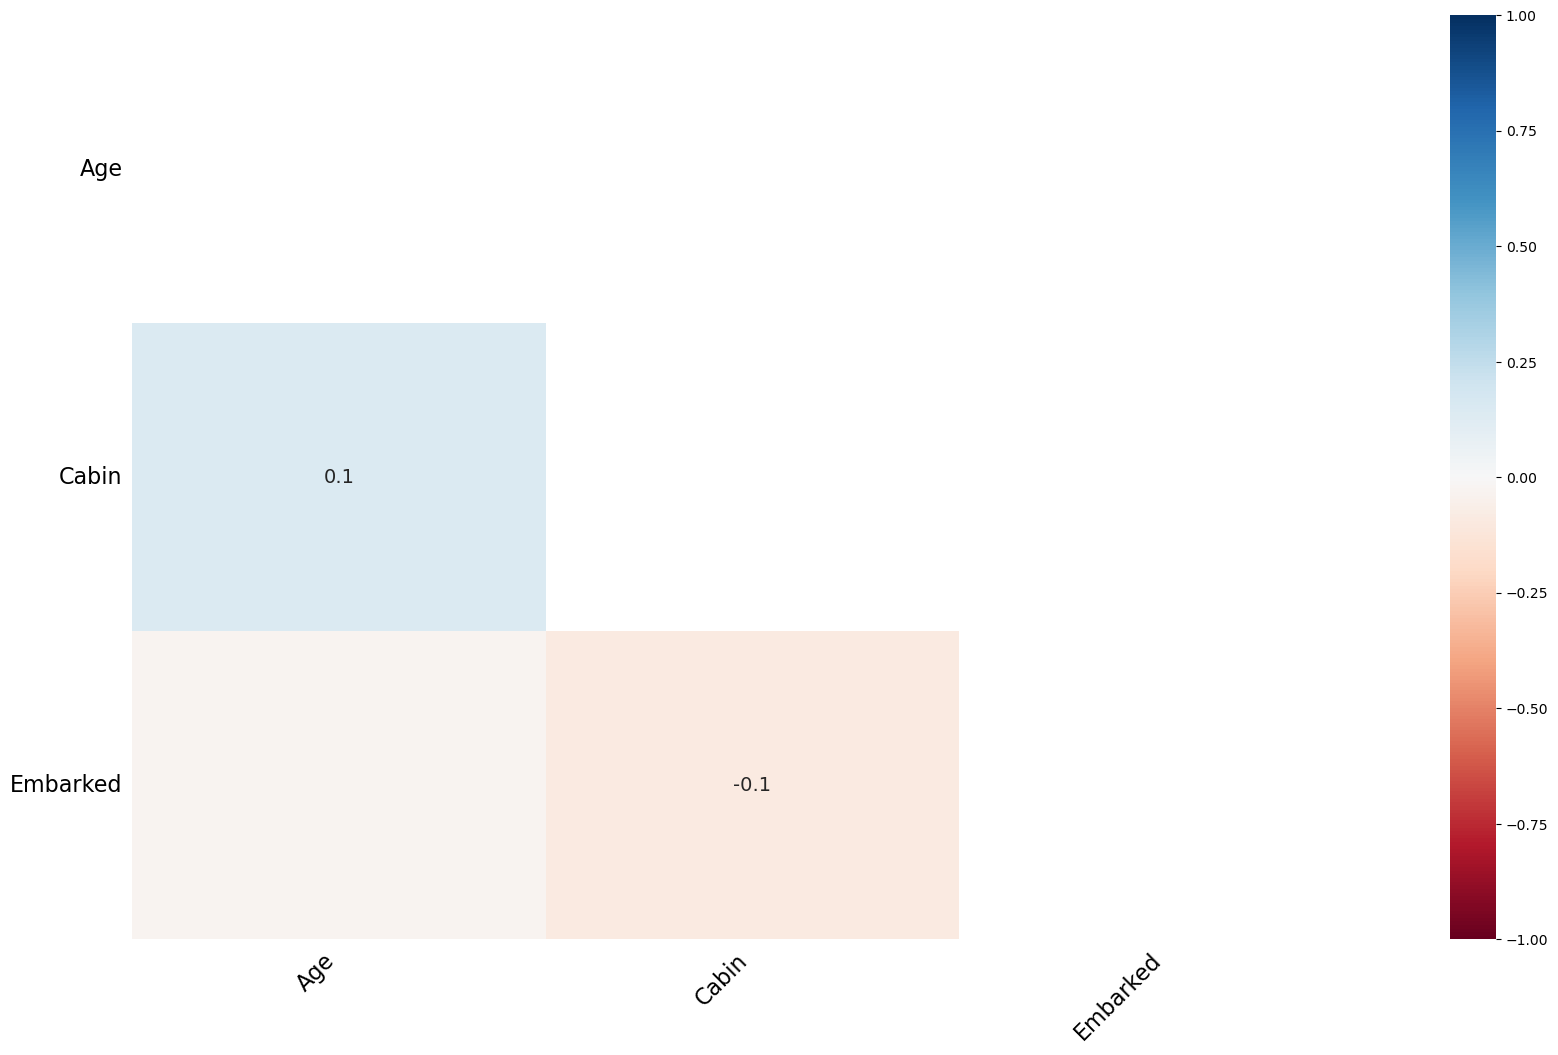

In [90]:
# Eksik değerlerin belirli bir korelasyon ile ortaya çıkıp çıkmadığını görelim
# Eksik değellerin rassallığı ile ilgileniyoruz. Eksiklik değişkenler arasında bir
# bağlılıkla mı oluşuyor yoksa böyle bir ilişki yok mu ? Gibi sorulara cevap arıyoruz
# Örnedğin iki değişken birlikte azalıyorsa burada bir bağımlılık var diyebiliriz
msno.heatmap(df)
plt.show()

#### Eksik Değerlerin Bağımlı Değişken ile Analizi
------------

In [91]:
# Eksik değere sahip üm değişkenleri görelim
missing_values_table(df, True)
na_cols = missing_values_table(df, True)
na_cols

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

In [92]:
# Hayatta kalma durumunu neler etkiliyor bunu anlamaya çalışıyoruz:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


In [93]:
# 1: Eksiklik olan değerler
# 0: Eksik olmayan değerler
missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




**Çıkarımlar**

**Yaş bilgisinin yokluğuna göre hayatta kalma durumu**

> Yaş bilgisi olmayanların hayatta kalma oranı: **%29.4**
Yaş bilgisi olan yolcuların ise: **%40.6**

**Cabin bilgisinin yokluğuna göre hayatta kalma durumu**

> Kabin bilgisi olmayanların hayatta kalma oranı: **%30**
Kabil bilgisi olan yolcuların ise: **%66.7**

**Embarked bilgisi yeteri kadar örnekleme sahip olmadığı için herhangi bir yorum yapmak yanlış olur.**

Cabin bilgisinde birçok NA ifadesinin gemi çalışanlarına ait kabin bilgileri olduğu bilgisini bilerek incelediğimizde veri oldukça anlamlı sonuçlar vermektedir. Feature Extraction Bölümünde bu değişkeni kullanıyor olacağız.

### Neler öğrendik: 

**1- Missing Values**

**2- Eksik değer problemlerinin nasıl çözeriz**

  - Çözüm - 1 : Silerek
    
  - Çözüm - 2 : Basit atama yöntemleri ile doldurmak (mean, median)
>   Bağlı bir değişkene göre atama yaparak (groupby, mean)
      
  - Çözüm 3 : Tahmine Dayalı Atama ile Doldurma (dummies, scaler, knn, inverse)

**3- Eksik veriyi görsel olarak incelemek**

**4- Eksik değerlerin bağımlı değişken ile analizi(eksik değerlere göre çıkarımlarda bulunmak**

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">3. Encoding Scaling 📁</h3>

Veri bilimi ve makine öğrenimi süreçlerinde, veri setlerinde bulunan kategorik değişken türlerinin (yazılar, cümleler gibi text/string formatında olan veriler) makinelerin anlayabileceği bir formatta yeniden yazmaya Encoding denir. Kategorik değişkenler, algoritmalar tarafından işlenebilir bir hale getirilmesi amacıyla, sayısal temsili değerlere dönüştürülür.

Credit: https://miuul.com/not-defteri/encoding-nedir-turleri-nelerdir

#### Label Encoding
-------------
Bir kategorik değişkenin sınıfları labellardır. Label encoding bu sınıfları modellerde daha kullanışlı ve modellerin anlayabileceği hale getirecek şekilde kodlama yöntemlerinden biridir. Label encoding yapılacak olan bir kategorik değişkenin iki sınıfı olması durumunda yapılacak işleme özel olarak binary encoding (ikili karakter kodlaması) adı verilir. Örneğin string ifadeler ile temsil edilen kadın/erkek olma durumunu, 0 ve 1 değerlerini kullanarak ifade etmek bir label encoding yöntemidir.

Ordinal(sıralı) değerler içeren bir değişkene label encoding uygulayabiliriz. Örnek eğitim seviyeleri: **İlk okul, lise, üniversite, yüksek lisans ----> 0, 1, 2, 3.**

Fakat futbol takımlarından oluşan bir liste label encodingten geçirilirse sıralama yani büyüklük olarak algılar. O yüzden labe encoding için uygun değil: **GS, FB, TS, BJK ----> 0, 1, 2, 3**

In [94]:
# Label Encoding & Binary Encoding(0-1)
# Makine öğrenmesi için veriyi eğitmek istediğimizde, kategorik değişkenler devre dışı kalırlar.
# Bunu önlemek ve kdleri kullanabilmek için farklı encoding metodlarını kullanırız:

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [95]:
df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [96]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [97]:
# Alfabetik sıraya göre değer verir, bu yüzden female:0 male:1 olarak atandı
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]

array([1, 0, 0, 0, 1])

In [98]:
# Hnagi sınıf olduklarını unuttuk nasıl geri çevirebilirim:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [99]:
# Elimde çok fazla sayıda kategorik değişken var ve ben sadece 2 farklı değere sahip olanları yakalamak istiyorum:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

df = load()

# LE'yi Yalnızca 2 değere sahip kategorik değişkenlere uygulamak istiyorum:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,S


In [101]:
# daha fazla sayısa değişkene sahip bir veri seti üzerinde çalışalım
df = load_application_train()
df.shape

(307511, 122)

In [102]:
# LE'yi Yalnızca 2 değere sahip kategorik değişkenlere uygulamak istiyorum:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
binary_cols

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [103]:
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [104]:
for col in binary_cols:
    label_encoder(df, col)
    
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


In [105]:
# le sonrası EMERGENCYSTATE_MODE değişkeninde yer alan NAN yani missing değerleride encode etti, bunu engellememiz gerekir:
# tekrar titanic veri setine dönerek bu durumu inceleyelim

df = load()
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [106]:
df["Embarked"].nunique()

3

In [107]:
df["Embarked"].unique()
#unique ve nunique kullanırken bu detaya dikkat etmemiz gerekir.

array(['S', 'C', 'Q', nan], dtype=object)

#### One Hot Encoding
-------------

One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir. Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışında ki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir. Örneğin aşağıda 3 kategoride veri vardır apple,chicken ve broccoli bu alanlar binary olarak ayrıştırıldığında Apple için ilk satır 1 iken diğerleri 0 oluyor Diğer veri içinde aynı şekilde sayısal veriye çevirme işlemi devem ediyor. 

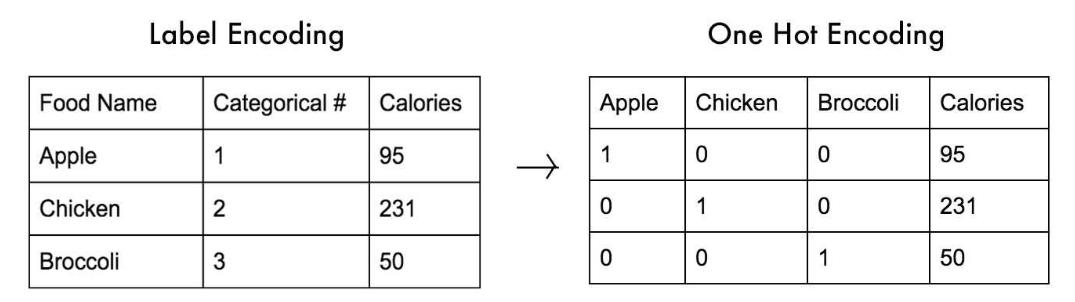

credit: https://womaneng.com/one-hot-encoding-nedir-nasil-yapilir/

In [108]:
# Titanic veri seti üzeründe OHE yapalım:
df = load()
df.head()
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [109]:
# input
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [110]:
pd.get_dummies(df, columns=["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1


In [111]:
pd.get_dummies(df, columns=["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1


In [112]:
ohe_df = pd.get_dummies(df, columns=["Embarked"]).head()
ohe_df.filter(like='Embarked', axis=1).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [113]:
# dummy değişken tuzağına düşmemek için yani değişkenler birbirleri üzerinden üretilmesinler. 
# Bu tuzağı aşmak için, ilk argümanı çırarıp encode işlemini yaparız:
pd.get_dummies(df, columns=["Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,1


In [114]:
# Embarked içerisinde eksik değer olduğunun biliyoruz. Onlar içinde bir sınıf oluşturmak istersek eğer:
# Bazen eksik değerlerde önemli bilgiler verebilirler.
pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1,0


In [115]:
# get_dummies kullanarak hem binary encoding işlemini(2 sınıftan oluşan değişkenler için) hem de one hot encoding yapabiliriz:
pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,1,0,1


In [116]:
# süreci fonksiyonel bir yapıya alıyoruz
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

# veri setini tekrar yükleme işlemi
df = load()

# değişkenleri tiplerine göre ayırt etme:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [117]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [118]:
# OHE yi hangilerine uygulamak istiyorum ? 
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['Pclass', 'SibSp', 'Parch', 'Embarked']

In [119]:
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Rare Encoding
-------------
Rare nadir, az gözlemlenen demektir. Bir veri setindeki kategorik değişkenlerin sınıflarının gözlenme sayılarını incelendiğinde bazı gözlem sınıflarının frekanslarının çok düşük olduğunu düşünelim. Bunun gibi bir senaryoda çok düşük frekanstaki gözlemler için one-hot encode ile bir değer ataması yapılması uygun olmayacaktır.  Çünkü çok düşük frekanstaki her bir gözlem için yeni bir sütun oluşturulacak, ilgili sınıfa ait olmayan diğer gruplar için 0 değeri verilecektir. Bu da çok sayıda 0’dan oluşan gereksiz sütunun oluşmasına neden olacaktır.

credit: https://serdartafrali.medium.com/veri-biliminde-encoding-i%CC%87%C5%9Flemleri-616e87bf8c74

In [120]:
# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
# 3. Rare encoder yazacağız.

In [121]:
# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
df = load_application_train()
df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [122]:
# Kategorik değişkenlere erişiyorum
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOC

In [123]:
# veri setinde yer alan değişkenlerin sahip olduğu sınıfların frekans ve oranlarını öğrenelim:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [124]:
for col in cat_cols:
    cat_summary(df, col)

                 NAME_CONTRACT_TYPE  Ratio
Cash loans                   278232 90.479
Revolving loans               29279  9.521
##########################################
     CODE_GENDER  Ratio
F         202448 65.834
M         105059 34.164
XNA            4  0.001
##########################################
   FLAG_OWN_CAR  Ratio
N        202924 65.989
Y        104587 34.011
##########################################
   FLAG_OWN_REALTY  Ratio
Y           213312 69.367
N            94199 30.633
##########################################
                 NAME_TYPE_SUITE  Ratio
Unaccompanied             248526 80.819
Family                     40149 13.056
Spouse, partner            11370  3.697
Children                    3267  1.062
Other_B                     1770  0.576
Other_A                      866  0.282
Group of people              271  0.088
##########################################
                      NAME_INCOME_TYPE  Ratio
Working                         158774 51.632
C

Değişkenlerin elemanlarının veri setindeki yoğunluklarını incelediğimiz zaman fark ediyoruz ki, **%1 oran**ının bile altında frekansa sahip değerlerin olduğu görülüyor. Bunu neden yapıyoruz ? Direk one hot encoding yaptığımız zaman hangi değerin ne kadar yopun bir şekilde veri setinde tekrar ettiğine bakmaksızın encode ediyorduk. Şimdi ise yoğunluk oranlarına göre değerleri analiz ederek model eğitiminin daha sağlıklı olabilmesi için detaylara iniyoruz.

In [125]:
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [126]:
# Hedef değikene göre NAME_INCOME_TYPE değişlkenindeki değerlerin davranışlarına bakalım:
# 1: Ödeme yapamama durumu. İş adamları ödemelerinde sorun yok bu yüzden 0.
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()

NAME_INCOME_TYPE
Businessman            0.000
Commercial associate   0.075
Maternity leave        0.400
Pensioner              0.054
State servant          0.058
Student                0.000
Unemployed             0.364
Working                0.096
Name: TARGET, dtype: float64

In [127]:
# Hedef değişkene göre diğer değişkenlerin elemanlarının rare durumunu analiz edelim.
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
        print("----------------------------------------")

rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


----------------------------------------
CODE_GENDER : 3
      COUNT  RATIO  TARGET_MEAN
F    202448  0.658        0.070
M    105059  0.342        0.101
XNA       4  0.000        0.000


----------------------------------------
FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


----------------------------------------
FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


----------------------------------------
NAME_TYPE_SUITE : 7
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Group of people     271  0.001        0.085
Other_A             866  0.003        0.088
Other_B            1770  0.006        0.098
Spouse, partner   11370  0.0

#### Rare Encoding Fonksiyonu
-------------

In [128]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [129]:
df["NAME_HOUSING_TYPE"].value_counts() / len(df)

House / apartment     0.887
With parents          0.048
Municipal apartment   0.036
Rented apartment      0.016
Office apartment      0.009
Co-op apartment       0.004
Name: NAME_HOUSING_TYPE, dtype: float64

In [130]:
new_df = rare_encoder(df, 0.01)
rare_analyser(new_df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


----------------------------------------
CODE_GENDER : 3
       COUNT  RATIO  TARGET_MEAN
F     202448  0.658        0.070
M     105059  0.342        0.101
Rare       4  0.000        0.000


----------------------------------------
FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


----------------------------------------
FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


----------------------------------------
NAME_TYPE_SUITE : 5
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Rare               2907  0.009        0.094
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


----------------------

#### Feature Scaling (Özellik Ölçeklendirme)
-------------

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Example, if we have weight of a person in a dataset with values in the range 15kg to 100kg, then feature scaling transforms all the values to the range 0 to 1 where 0 represents lowest weight and 1 represents highest weight instead of representing the weights in kgs.

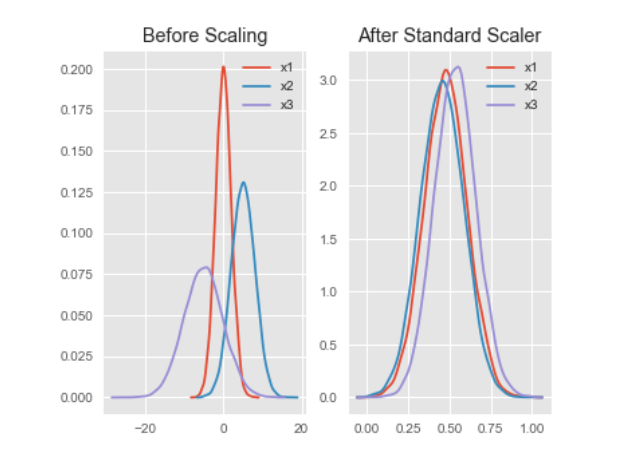

credit: https://www.i2tutorials.com/what-is-feature-scaling/ , https://en.wikipedia.org/wiki/Feature_scaling

gradient descent: Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.


- Özellikle gradint descent kullanan algoritmaların train sürelerini kısaltma durumudur. Scale edilmiş featurelar söz konusu olduğunda bu ölçeklendirilmiş feature ların üreteceği error ların boyutları, hataların boyutları ve bunların iteratif olarak azaltılması çabası değişkenler standart olduğunda daha hızlı olmaktadır. 

**Ana sebepler:**
1) Kullanılacak olan yöntemlere değişkenleri gönderirken onlara eşit muamele yapılması gerektiğini bildirmemiz gerekiyor. Bundan dolayı bir standartlaştırmaya ihtiyacımız var.

2) Özellikle gradient descent kullanan algoritmaların train sürelerini kısaltmak için.

3) Uzaklık temelli yöntemlerde büyük değerlere sahip değişkenler dominantlık sergilemektedir, yani ezicilik sergilemektedir. Özellikle KNN, k-means ve PCA gibi uzaklık temelli ya da benzerlik-benzemezlik temelli bazı yöntemler kullanılıyor olduğunda burada ölçeklerin birbirinden farklı olması durumu yapılacak olan uzaklık-yakınlık, benzerlik-benzemezlik hesaplarında yanlılığa sebep olmaktadır. Dolayısıyla yapacak olduğunuz işlem değişkenleri standartlaştırma işlemidir ve bunun sebebi eşit şlartlarda yaklaşmak, eğitim süresini hızlandırmak ve özellikle uzaklık temelli yöntemlerde yanlılığın önüne geçmektir. 

In [131]:
###################
# StandardScaler: Klasik standartlaştırma. Ortalamayı çıkar, standart sapmaya böl. z = (x - u) / s
###################
df = load()
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


In [132]:
# İşlemleri anlamak için ilk indexte nasıl  bir hesaplama yapıldığını anlayalım: 
(df["Age"][0] - df["Age"].mean()) / df["Age"].std()

-0.5300050983330725

In [133]:
###################
# RobustScaler: Medyanı çıkar iqr'a böl.
###################
# Std ve mean metrikleri aykırı değerlerden etkilenirler. Dolayısıyla burada bütün gözlem değerlerinden medyanı çıkarsak daha sonra
# bölme işlemi için de standart sapma gibi yine aykırı değerlerden etkilenen bir değeri değilde IQR a bölsek:
# RobustScaler: Medyanı çıkar IQR a böl.
# Robust scaler, standart scaler a göre aykırı değerlere karşı dayanıklı olduğundan dolayı daha tercih edilebilir olabilir.
rs = RobustScaler()
df["Age_robuts_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


In [134]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392


In [135]:
# robust nasıl hesaplama yapıyor ?
# RobustScaler is a median-based scaling method. 
# The formula of RobustScaler is (Xi-Xmedian) / Xiqr, so it is not affected by outliers.
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3- q1 
(df["Age"][0] - df["Age"].median()) / iqr

-0.3356643356643357

In [136]:
###################
# MinMaxScaler: Verilen 2 değer arasında değişken dönüşümü
###################

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
# Default olarak 0-1 arasında bir standartlaştırma uygular
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_min_max_scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


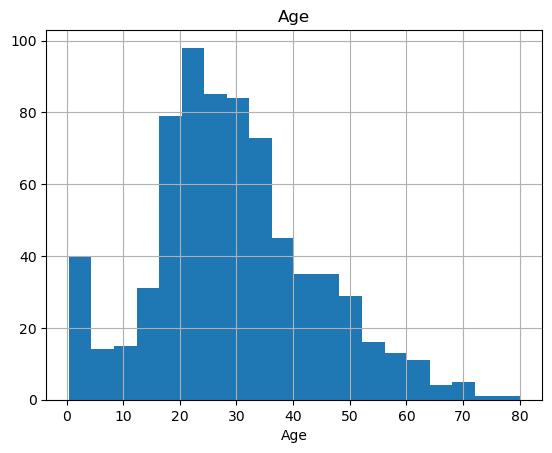

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


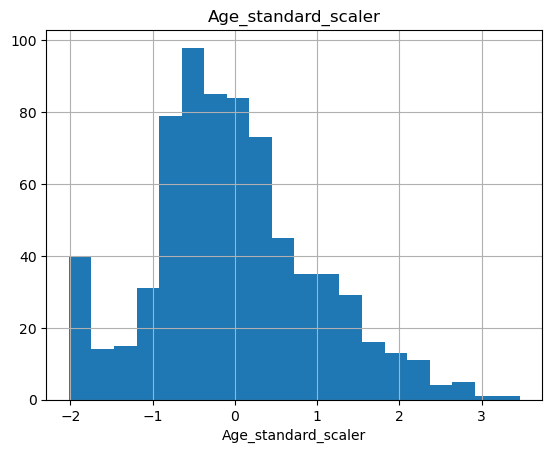

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robuts_scaler, dtype: float64


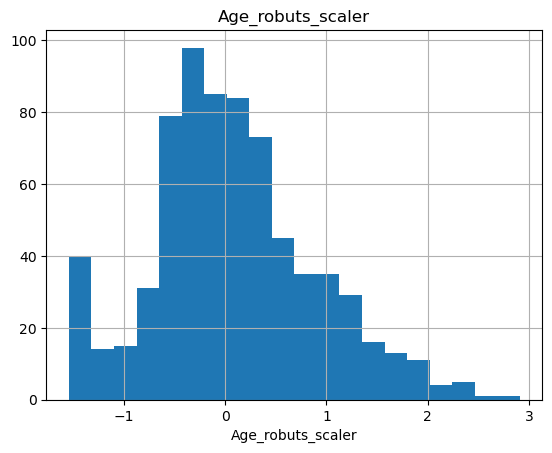

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


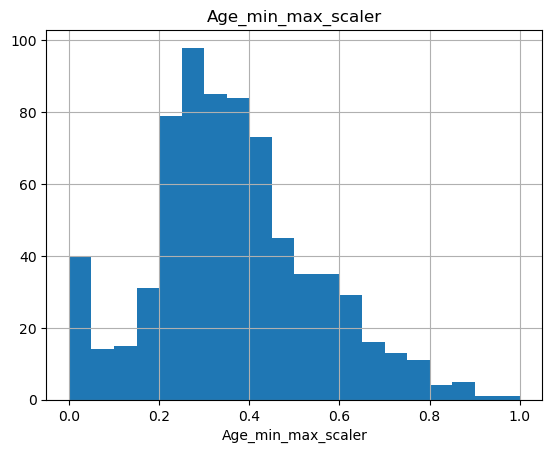

In [137]:
# Yapılarını koruyacak şekilde ifade ediş tarzlarını değiştirmektir
age_cols = [col for col in df.columns if "Age" in col]

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in age_cols:
    num_summary(df, col, plot=True)

In [138]:
###################
# Numeric to Categorical: Sayısal Değişkenleri Kateorik Değişkenlere Çevirme
# Binning
###################

df["Age_qcut"] = pd.qcut(df['Age'], 5)
df["Age_qcut"].head()

0    (19.0, 25.0]
1    (31.8, 41.0]
2    (25.0, 31.8]
3    (31.8, 41.0]
4    (31.8, 41.0]
Name: Age_qcut, dtype: category
Categories (5, interval[float64, right]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

### Neler öğrendik: 

**1- Encoding**
   - Label Encoding
   - One Hot Encoding
   - Rare Encoding

**2- Feature Scaling**
   - StandardScaling
   - RobustScaling
   - MinmaxScaling

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">4. Feature Extraction (Özellik Çıkarımı) 📁</h3>

Ham verilerden değişken üretmek anlamına gelir. Tarih verisi üzerinden gün ay yıl bilgilerini çekerek yeni değişkenler türetilebilir.

Özellik çıkarımı (vasıflandırma, feature extraction) işlemi bir boyut azaltma (dimension reduction, dimensionality reduction) işlemidir. Buna göre karmaşık olan bir verinin boyutları azaltılarak daha basit bir problem haline indirgenir.

credit: https://bilgisayarkavramlari.com/2008/12/01/ozellik-cikarimi-feature-extraction/

In [139]:
# Örneğin titanic veri setinde yer alan Mr. Miss. gibi ünvanlardan oluşan bir değişken
# türetebiliriz. Örneğin ünvana göre hayatta kalma durumu bize ciddi bir bilgi veriyor olabilir.
df = load()
df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

#### Binary Features
-------------

İkili özellikler, belirli özelliklerin varlığına veya yokluğuna göre karar verilmesi gereken bir dizi uygulamada kullanılır. Örneğin, tıbbi tanıda, 1 tıbbi bir testte normal bir değeri ve 0 anormal bir değeri temsil edebilir.

In [140]:
#############################################
# Binary Features: Flag, Bool, True-False
#############################################
# Cbin bilgisinde nan değerlere 0 diğerlerine 1 veriyorum.
df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype('int')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0


In [141]:
# Cabin bilgisinin varlığının hedef(bağımlı) değişken üzerindeki etkisi nedir ?
# Görüyorum ki cabin bilgisi olan yolcuların hayatta kalma oranı %66.7 
df.groupby("NEW_CABIN_BOOL").agg({"Survived": "mean"})

,Survived
NEW_CABIN_BOOL,
0,0.300
1,0.667


### P-değerinin Anlamlı Olup Olmadığı Nasıl Anlaşılır?

P-değeri, olayların şans eseri meydana gelme olasılığının (yani sıfır hipotezin doğru olması) ne kadar olası olduğunu açıklayan bir sayıdır.

İstatistiksel anlamlılık seviyesi 0 ile 1 arasında bir p-değeri olarak ifade edilir. P-değeri ne kadar küçükse, sıfır hipotezini reddetmeniz gerektiğine dair kanıt o kadar güçlüdür.

Eşik değer(kritik değer veya alfa değeri olarak da ifade edilir) çalışma alanına bağlıdır. Bazı alanlar 0,01, hatta 0,001 eşiklerini tercih eder. Ancak en yaygın eşik p < 0,05’tir.

Kritik değerin 0,05 seçildiğin bir araştırmada 0,05’ten küçük bir p-değeri istatistiksel olarak anlamlıdır. Boş hipotezin doğru olma olasılığı %5’ten az olduğundan, sıfır hipotezine karşı güçlü kanıtlar gösterir. Bu nedenle sıfır hipotezini reddeder ve alternatif hipotezi kabul ederiz. Ancak bu durum, alternatif hipotezin doğru olma olasılığının %95 olduğu anlamına gelmez. P-değeri, sıfır hipotezinin doğru olmasına bağlıdır, ancak alternatif hipotezin doğruluğu veya yanlışlığı ile ilgisi yoktur.

0,05’ten yüksek bir p-değeri istatistiksel olarak anlamlı değildir ve sıfır hipotezi için güçlü kanıtlara işaret eder. Bu, sıfır hipotezini koruduğumuz ve alternatif hipotezi reddettiğimiz anlamına gelir.

İstatistiksel olarak anlamlı bir sonuç, bir araştırma hipotezinin doğru olduğunu kanıtlayamaz. Çünkü bu %100 kesinlik anlamına gelir. Bunun yerine, sonuçların araştırma hipotezini “desteklediğini” veya “kanıt verdiğini” belirtilebilir.

credir: https://www.veribilimiokulu.com/p-degeri/#:~:text=Kritik%20de%C4%9Ferin%200%2C05%20se%C3%A7ildi%C4%9Fin,hipotezine%20kar%C5%9F%C4%B1%20g%C3%BC%C3%A7l%C3%BC%20kan%C4%B1tlar%20g%C3%B6sterir.

In [142]:
# Çok değişkneli etki daha sonra inceliyor olacağız. Fakat şimdi görüyoruz ki p1 ve p2 değerleri
# arasında analamlı bir istatistik olduğu görülmektedir.
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
                                             df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
                                            df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 9.4597, p-value = 0.0000


In [143]:
# Şimdide 'SibSp' ve 'Parch' değişkenlerine odaklanalım:
# Buradaki mantık şudur: kişinin hiç yakını yoksa o kişi yalnız seyahat ediyor demektir.
# Bu koşula göre yeni bir değişken oluşturdum: NEW_IS_ALONE
df.loc[((df['SibSp'] + df['Parch']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SibSp'] + df['Parch']) == 0), "NEW_IS_ALONE"] = "YES"

# Yalnızlık bilgisinin hedef(bağımlı) değişken üzerindeki etkisi nedir ?
df.groupby("NEW_IS_ALONE").agg({"Survived": "mean"})

,Survived
NEW_IS_ALONE,
NO,0.506
YES,0.304


In [144]:
# Yalnız seyahet ediyor olanların kurtulma ihtimali %30.4 gibi görünüyor gerçekten bu veri anlamlı mı ?
# İstatistik açısından anlamlı mı ? Bir hipotez testine ihtiyacımız var:
# Sonuca göre iki değer arasında anlamlı bir ilişki mevcut. H0 reddedilir.
# Daha net şekilde etkiyi modelleme sürecinde göreceğiz.
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].sum(),
                                             df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].shape[0],
                                            df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].shape[0]])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -6.0704, p-value = 0.0000


#### Text Features
-------------

In [145]:
#############################################
# Text'ler Üzerinden Özellik Türetmek
#############################################
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [146]:
###################
# Letter Count
###################
# Değişkende kaç tane harf var ?
df["NEW_NAME_COUNT"] = df["Name"].str.len()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24


In [147]:
###################
# Word Count
###################
# Herbir isimde kaç adet kelime var ?
df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4


In [148]:
###################
# Özel Yapıları Yakalamak
###################
# Doktor olanların hayatta kalma oranlarını frekanslarıyla beraber inceleyelim:
# 10 doktor var.
df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
df.groupby("NEW_NAME_DR").agg({"Survived": ["mean","count"]})

Survived      
                mean count
NEW_NAME_DR               
0              0.383   881
1              0.500    10

#### Regex Features
-------------

In [149]:
###################
# Regex ile Değişken Türetmek
###################
# isim bilgisinde yer alan ünvanları almak istiyorum. Doğru pattern i tespit ettikten sonra 
# regex euygun formatta istek gönderiyorum.
df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4,0,Mr


In [150]:
# Ünvan değişkeniyle hayatta kalma arasındaki ilişkiye bakalım.
df[["NEW_TITLE", "Survived", "Age"]].groupby(["NEW_TITLE"]).agg({"Survived": "mean", "Age": ["count", "mean"]})

Survived   Age       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

#### Date Features
-------------

In [151]:
#############################################
# Date Değişkenleri Üretmek
#############################################
dff = pd.read_csv("/kaggle/input/course-reviews/course_reviews.csv")
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000


In [152]:
# Timestamp değişleni tarih zaman değişkeni olması gerekirken object değişkeni olarak görünöektedir.
# Bu değişkeni tarih zaman formatına çevirmemiz gerekiyor.
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


In [153]:
dff['Timestamp'] = pd.to_datetime(dff["Timestamp"], format="%Y-%m-%d")
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rating              4323 non-null   float64       
 1   Timestamp           4323 non-null   datetime64[ns]
 2   Enrolled            4323 non-null   object        
 3   Progress            4323 non-null   float64       
 4   Questions Asked     4323 non-null   float64       
 5   Questions Answered  4323 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 202.8+ KB


In [154]:
# year
dff['year'] = dff['Timestamp'].dt.year

# month
dff['month'] = dff['Timestamp'].dt.month

# year diff
dff['year_diff'] = date.today().year - dff['Timestamp'].dt.year

# day name
dff['day_name'] = dff['Timestamp'].dt.day_name()

# month diff (iki tarih arasındaki ay farkı): yıl farkı + ay farkı
dff['month_diff'] = (date.today().year - dff['Timestamp'].dt.year) * 12 + date.today().month - dff['Timestamp'].dt.month

dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff,day_name,month_diff
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2,2,Friday,29
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2,2,Thursday,29
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2,2,Thursday,29
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2,2,Thursday,29
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2,2,Thursday,29


#### Özellik Etkileşimleri ( Feature Interaction )
-------------
Değişkenler arasında etkileşim sonucu doğan yeni değişkenler türetme durumudur.

In [155]:
#############################################
# Feature Interactions (Özellik Etkileşimleri)
#############################################
df = load()
df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_AGE_PCLASS
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,66.000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,38.000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,78.000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,35.000
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,105.000


In [156]:
# Toplam aile nufusunu öğrenmek istiyoruz:
df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1

df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'

df.loc[(df['Sex'] == 'male') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturemale'

df.loc[(df['Sex'] == 'male') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'

df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'

df.loc[(df['Sex'] == 'female') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'

df.loc[(df['Sex'] == 'female') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_AGE_PCLASS,NEW_FAMILY_SIZE,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,66.000,2,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,38.000,2,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,78.000,1,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,35.000,2,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,105.000,1,maturemale


In [157]:
df.groupby("NEW_SEX_CAT")["Survived"].mean()

NEW_SEX_CAT
maturefemale   0.774
maturemale     0.199
seniorfemale   0.909
seniormale     0.135
youngfemale    0.679
youngmale      0.250
Name: Survived, dtype: float64

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">5. Feature Engineering & Data Preprocessing Uygulama 📁</h3>

In [158]:
#############################################
# Titanic Uçtan Uca Feature Engineering & Data Preprocessing
#############################################
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [159]:
df.shape

(891, 12)

In [160]:
# Bütün değişken isimlerini büyükm harf yapıyorum: 
df.columns = [col.upper() for col in df.columns]
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [161]:
#############################################
# 1. Feature Engineering (Değişken Mühendisliği)
#############################################
# Cabin bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')
# Name count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()
# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))
# name dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
# name title
df['NEW_TITLE'] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)
# family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df['PARCH']) == 0), "NEW_IS_ALONE"] = "YES"
# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'
# sex x age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,23,4,0,Mr,2,66.000,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,51,7,0,Mrs,2,38.000,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,22,3,0,Miss,1,78.000,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,44,7,0,Mrs,2,35.000,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,24,4,0,Mr,1,105.000,YES,mature,maturemale


In [162]:
df.shape

(891, 22)

In [163]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if "PASSENGERID" not in col]

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [164]:
#############################################
# 2. Outliers (Aykırı Değerler)
#############################################

for col in num_cols:
    print(col, check_outlier(df, col))

for col in num_cols:
    replace_with_thresholds(df, col)

for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True
AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


In [165]:
#############################################
# 3. Missing Values (Eksik Değerler)
#############################################
missing_values_table(df)

                n_miss  ratio
CABIN              687 77.100
AGE                177 19.870
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


In [166]:
# CABIN için zatan bir değişken oluşturduğumuz için bu değişkeni silelim:  
df.drop("CABIN", inplace=True, axis=1)

In [167]:
remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace=True, axis=1)

In [168]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,male,22.000,1,0,7.250,S,0,23,4,0,Mr,2,66.000,NO,mature,maturemale
1,2,1,1,female,38.000,1,0,65.634,C,1,45,7,0,Mrs,2,38.000,NO,mature,maturefemale
2,3,1,3,female,26.000,0,0,7.925,S,0,22,3,0,Miss,1,78.000,YES,mature,maturefemale
3,4,1,1,female,35.000,1,0,53.100,S,1,44,7,0,Mrs,2,35.000,NO,mature,maturefemale
4,5,0,3,male,35.000,0,0,8.050,S,0,24,4,0,Mr,1,105.000,YES,mature,maturemale


In [169]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))


df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [170]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [171]:
#############################################
# 4. Label Encoding
#############################################

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [172]:
#############################################
# 5. Rare Encoding
#############################################
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


----------------------------------------
EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


----------------------------------------
NEW_TITLE : 17
          COUNT  RATIO  TARGET_MEAN
Capt          1  0.001        0.000
Col           2  0.002        0.500
Countess      1  0.001        1.000
Don           1  0.001        0.000
Dr            7  0.008        0.429
Jonkheer      1  0.001        0.000
Lady          1  0.001        1.000
Major         2  0.002        0.500
Master       40  0.045        0.575
Miss        182  0.204        0.698
Mlle          2  0.002        1.000
Mme           1  0.001        1.000
Mr          517  0.580        0.157
Mrs         125  0.140        0.792
Ms            1  0.001        1.000
Rev           6  0.007        0.000
Sir           1  0.001        1.000


-------------------------

In [173]:
df = rare_encoder(df, 0.01)
df["NEW_TITLE"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

In [174]:
#############################################
# 6. One-Hot Encoding
#############################################
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols)
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.000,7.250,0,23,0,66.000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,0,38.000,65.634,1,45,0,38.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,26.000,7.925,0,22,0,78.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,35.000,53.100,1,44,0,35.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,35.000,8.050,0,24,0,105.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [175]:
df.shape

(891, 52)

In [176]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 52
cat_cols: 47
num_cols: 5
cat_but_car: 0
num_but_cat: 47


In [177]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [178]:
rare_analyser(df, "SURVIVED", cat_cols)

SURVIVED : 2
   COUNT  RATIO  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000


----------------------------------------
SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


----------------------------------------
NEW_CABIN_BOOL : 2
   COUNT  RATIO  TARGET_MEAN
0    687  0.771        0.300
1    204  0.229        0.667


----------------------------------------
NEW_NAME_DR : 2
   COUNT  RATIO  TARGET_MEAN
0    881  0.989        0.383
1     10  0.011        0.500


----------------------------------------
NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


----------------------------------------
PCLASS_2 : 2
   COUNT  RATIO  TARGET_MEAN
0    707  0.793        0.361
1    184  0.207        0.473


----------------------------------------
PCLASS_3 : 2
   COUNT  RATIO  TARGET_MEAN
0    400  0.449        0.557
1    491  0.551        0.242


--------------------------------

In [179]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]
useless_cols
# df.drop(useless_cols, axis=1, inplace=True)

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [180]:
#############################################
# 7. Standart Scaler
#############################################
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.561,-0.821,-0.437,0.066
1,0.663,2.032,2.248,-0.790
2,-0.255,-0.788,-0.559,0.434
3,0.434,1.419,2.126,-0.882
4,0.434,-0.781,-0.315,1.260


In [181]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,-0.561,-0.821,0,-0.437,0,0.066,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,0,0.663,2.032,1,2.248,0,-0.790,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,-0.255,-0.788,0,-0.559,0,0.434,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0.434,1.419,1,2.126,0,-0.882,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0.434,-0.781,0,-0.315,0,1.260,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [182]:
df.shape

(891, 52)

In [183]:
#############################################
# 8. Model
#############################################
y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8059701492537313

In [184]:
#############################################
# Hiç bir işlem yapılmadan elde edilecek skor?
#############################################
dff = load()
dff.dropna(inplace=True)
dff = pd.get_dummies(dff, columns=["Sex", "Embarked"], drop_first=True)
y = dff["Survived"]
X = dff.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7090909090909091

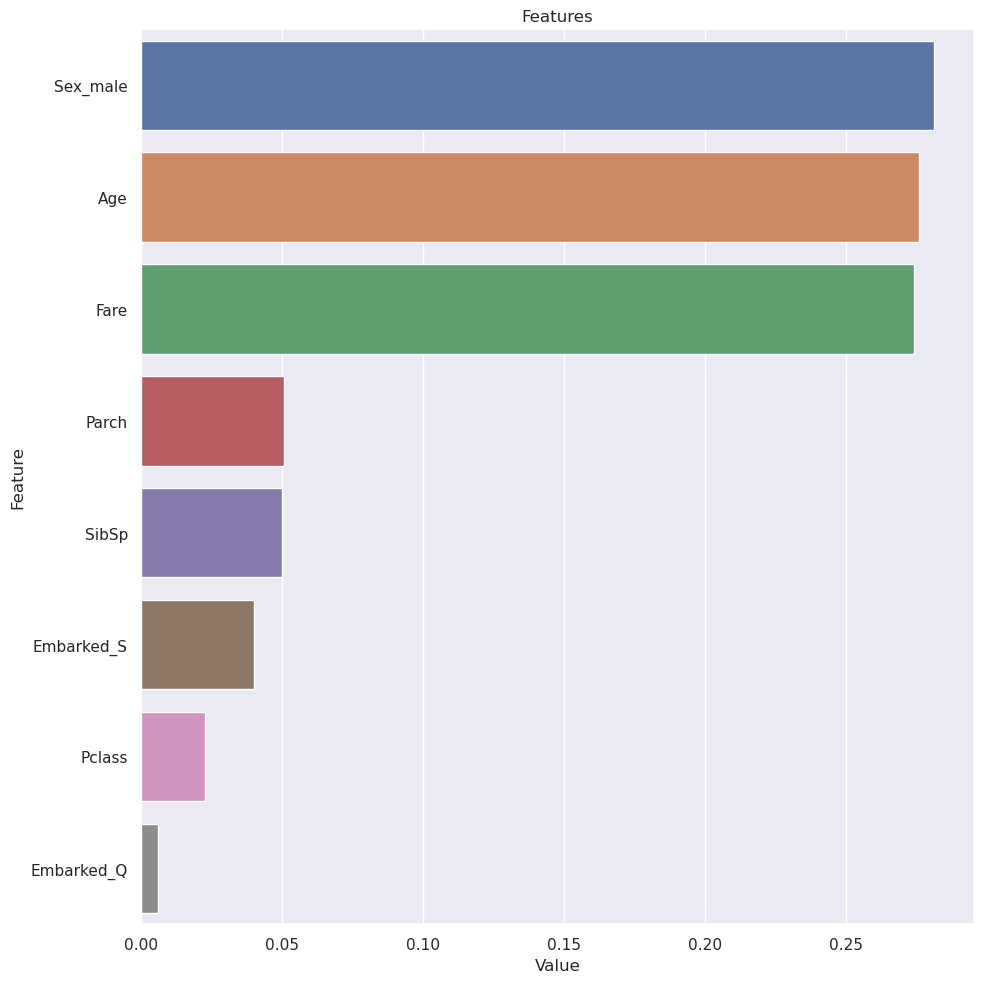

In [185]:
# Yeni ürettiğimiz değişkenler ne alemde?
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)
